In [1]:
# import everything needed for all the graphs
print("start")

# makes fancy tables
import numpy as np

# used to make the graphs
import matplotlib as mplt
import matplotlib.pyplot as plt
import pandas as pd

# used the shirnk down large numbers to a readable format
from hurry.filesize import (
    size,
    si,
    alternative,
)

from num2words import num2words

# makes the bar graphs colored
from colors import colorDictionary

# imports and stores the time to track the processing
import time

start = time.time()


start
HERE


In [2]:
# makes the main set of graphs for the functions
# they are edited where the graphs are made

# stores how many times a language has been used
occurrences = {}

# stores the usage of languages in bytes
top = {}

# the current id when looping through all of the items
current_id = "1"

# stores a list of the checked lines of code
checked = []

# ignores the first title/header line
started = False

# set to limmit the amount of projects that where parsed to help with testing
maxumum = 50_000_000
# maxumum = 1_000


def read(path):
    global maxumum, current_id, checked

    with open(path) as f:
        start = False

        for line in f:
            # checks if this line should be read
            if start and maxumum != 0:
                # sets the values from the csv
                id, language, size, date = line.split(",")

                # used to remove duplicates
                if f"{id},{language}" not in checked:
                    # checks if the project changes
                    if current_id != id:
                        # resets what lines have been checkd for duplicates to decrease ram used
                        checked = []
                        # sets the id to this project so
                        current_id = id

                    # if the language has been seen before:
                    if language in top:
                        # icrease the number of bytes it uses
                        top[language] += int(size)
                        # and the number of times its used
                        occurrences[language] += 1
                    else:  # if its a new language:
                        # record the number of byes it uses
                        top.update({language: int(size)})
                        # record that it was used onece
                        occurrences.update({language: 1})

                    # add this line to the list of checked lines
                    checked.append(f"{id},{language}")
                    # decrease how many until program stops looping
                    maxumum -= 1
            else:
                if start:
                    # start would only be true if this isnt the first line,
                    # so we hit the limit of loops and the loop will stop
                    break
                start = True  # set start to True so the rest of the project is used


print("defed")
for i in range(5):
    # /path/to/whatever/github_data/{i + 1}.csv
    maxumum = 50_000_000
#     maxumum = 1_000
    read(f"/media/t-rex/LEGO USB/{i + 1}.csv")
    print(i + 1)

print("end")

got = time.time() - start


defed
1
2
3
4
5
end


/tmp/ipykernel_21441/1524185397.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


[Text(10000.0, 1, '10 thousand'),
 Text(100000.0, 1, '1 hundred thousand'),
 Text(1000000.0, 1, '1 million'),
 Text(10000000.0, 1, '10 million'),
 Text(100000000.0, 1, '1 hundred million'),
 Text(1000000000.0, 1, '1 billion')]

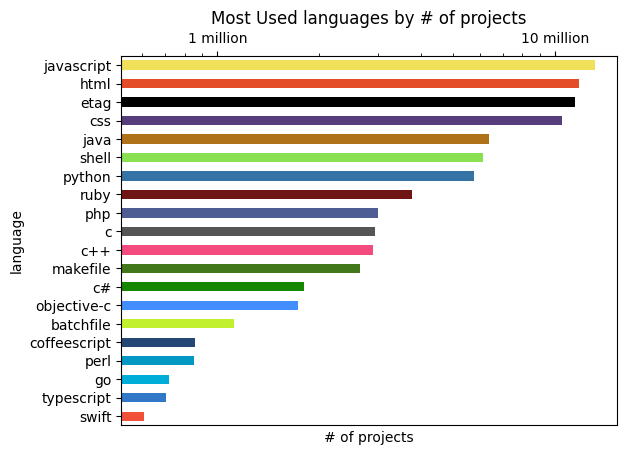

In [3]:
#### most used languages by # of projects

occurrences = {
    k: v for k, v in sorted(occurrences.items(), key=lambda item: item[1], reverse=True)
}

# makes a formated list of the top 20 languages by the number of times it's used
values = list([list(occurrences.values())[0:20][::-1]])

# makes a table/data frame for the data(it will be used later)
df3 = pd.DataFrame(values, index=[1], columns=list(occurrences.keys())[0:20][::-1])

# loops through the languages to get and store the colors for the bars
colors = []
for language in list(occurrences.keys())[0:20][::-1]:
    language = language.lower()
    if language in colorDictionary:
        colors.append(colorDictionary[language]["color"])
    else:
        colors.append("k")

# makes the grpah object
ax = df3.iloc[0].plot.barh(
    logx=True,
    xlabel="# of projects",
    ylabel="language",
    color=colors,
    title="Most Used languages by # of projects",
)
# moves the x labels to the top
ax.xaxis.tick_top()

xlabels = []
# gets all of the x Labels
for byte in ax.get_xticks():
    # adds the formated text to list of replacements
    xlabels.append(
        num2words(byte)
        .replace("one", "1")
        .replace("ten", "10")
        .replace("hundred", "100")
        .replace("1 100", "1 hundred")
    )
ax.set_xticklabels(xlabels)


/tmp/ipykernel_21441/2220507716.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


[Text(100.0, 1, '100BB'),
 Text(1000.0, 1, '1KB'),
 Text(10000.0, 1, '10KB'),
 Text(100000.0, 1, '100KB'),
 Text(1000000.0, 1, '1MB'),
 Text(10000000.0, 1, '10MB'),
 Text(100000000.0, 1, '100MB'),
 Text(1000000000.0, 1, '1GB'),
 Text(10000000000.0, 1, '10GB')]

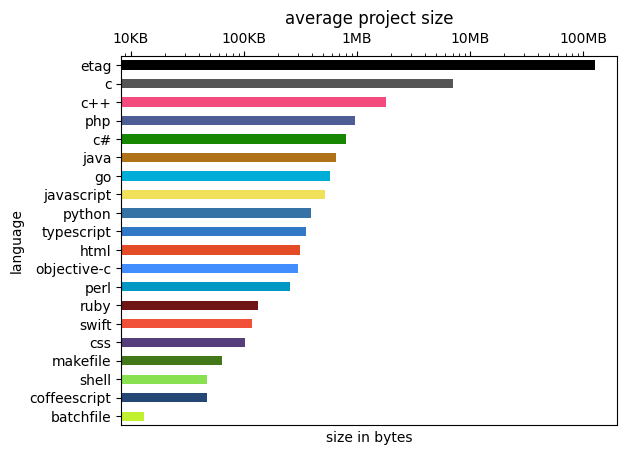

In [4]:
# graph to show the average size (amount of code or verbosity) of a coding language

# sorts the dictionary of projects an the amount of uses
occurrences = {
    k: v for k, v in sorted(occurrences.items(), key=lambda item: item[1], reverse=True)
}
averageSize = {}
total = 0
for key in occurrences:
    if total < 20:
        averageSize.update({key: top[key] / occurrences[key]})
        total += 1
    else:
        break
averageSize = averageSize
averageSize = {
    k: v for k, v in sorted(averageSize.items(), key=lambda item: item[1], reverse=True)
}

# makes a formated list of the top 20 languages by the average project size
values = list([list(averageSize.values())[0:20][::-1]])

# makes a table/data frame for the data(it will be used later)
df = pd.DataFrame(values, index=[1], columns=list(averageSize.keys())[0:20][::-1])

# loops through the languages to get and store the colors for the bars
colors = []
for language in list(averageSize.keys())[0:20][::-1]:
    language = language.lower()
    if language in colorDictionary:
        colors.append(colorDictionary[language]["color"])
    else:
        colors.append("k")

# makes the graph object
ax = df.iloc[0].plot.barh(
    logx=True,
    title="average project size",
    xlabel="size in bytes",
    ylabel="language",
    color=colors,
)

# moves the x labels to the top
ax.xaxis.tick_top()

xlabels = []
for byte in ax.get_xticks():
    xlabels.append(size(byte, system=si) + "B")

ax.set_xticklabels(xlabels)


/tmp/ipykernel_21441/1024114774.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)


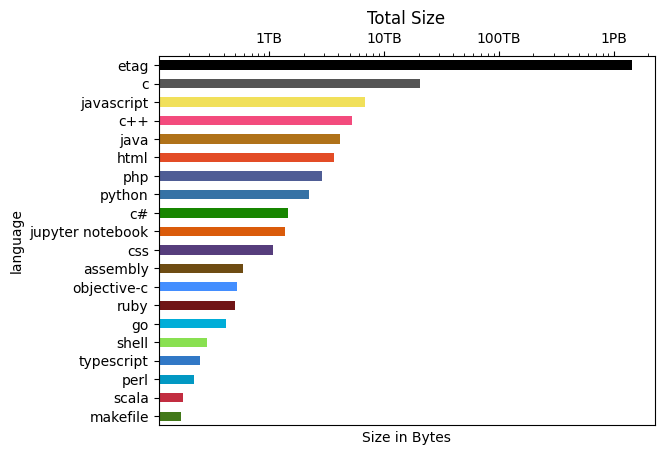

In [5]:
# show the amount of code per language by the size of bytes
top = {k: v for k, v in sorted(top.items(), key=lambda item: item[1], reverse=True)}

# makes a formated list of the top 20 languages by total size
values = list([list(top.values())[0:20][::-1]])

# makes a table/data frame for the data(it will be used later)
df = pd.DataFrame(values, index=[1], columns=list(top.keys())[0:20][::-1])  #

# loops through the languages to get and store the colors for the bars
colors = []
for language in list(top.keys())[0:20][::-1]:
    language = language.lower()
    if language in colorDictionary:
        colors.append(colorDictionary[language]["color"])
    else:
        colors.append("k")

# makes the graph object
ax = df.iloc[0].plot.barh(
    logx=True,
    xlabel="Size in Bytes",
    ylabel="language",
    color=colors,
    title="Total Size",
)

# moves the x labels to the top
ax.xaxis.tick_top()

xlabels = []
for byte in ax.get_xticks():
    xlabels.append(size(byte, system=si) + "B")
ax.set_xticklabels(xlabels)

mainPlot = time.time()


In [6]:
# iterates through the csvs again, to find what languages are used together
rec = time.time()
current_id = "1"
checked = []
maxumum = 50_000_000
# maxumum = 1_000

languages = list(
    {
        k: v
        for k, v in sorted(occurrences.items(), key=lambda item: item[1], reverse=True)
    }.keys()
)
# [
#     0:10
# ]  # limit the number of projects that will be graphed, helps with testing

languages = {language: {} for language in languages}

thisProject = []
usedWith = []


# languages used with:
# acosciated languages
def commonUses(path):
    with open(path) as f:
        global current_id, checked, maxumum, languages, thisProject, usedWith
        for line in f:
            if maxumum != 0:
                # the fisrst line doest break because "language" is not one of the top 5 languages
                #  print(line)
                id, language, size, date = line.split(",")

                if f"{id},{language}" not in checked:

                    if current_id != id:
                        checked.clear()
                        current_id = id
                        for origionalLanguage in usedWith:
                            subDict = languages[origionalLanguage]
                            
                            for language in thisProject:
                                if language != origionalLanguage:
                                    if language in subDict:
                                        subDict[language] += 1
                                    else:
                                        subDict[language] = 1
                        thisProject = []
                        usedWith = []

                    thisProject.append(language)

                    if language in languages:
                        usedWith.append(language)

                    checked.append(f"{id},{language}")
                    maxumum -= 1


print("defed")
for i in range(5):
    maxumum = 50_000_000
#     maxumum = 1_000
    commonUses(f"/media/t-rex/LEGO USB/{i + 1}.csv")
    print(i + 1)
print("end", time.time() - rec)
# print(languages)


defed
1
2
3
4
5
end 4525.181110620499


In [7]:

# def subGraph(index):
#     fig, ax = plt.subplots(figsize=(12, 7))
    
#     # the language that the graph is about, 
#     # dictionary of languages marjor lang is used with: and their quantitys
#     majorlanguage=list(languages.keys())[index]

#     dictionary=languages[majorlanguage]
#     # sorts the dictionary
#     dictionary = {    
#         k: v 
#         for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
#     }
    
#     # formats the sorted dictionary
#     values = [
#         tuple(dictionary.values())[0:5][::-1],
#     ]

#     # makes a table/data frame for the data(it will be used later)
#     df = pd.DataFrame(values, index=[1], columns=list(top.keys())[0:5][::-1])

#     # loops through the languages to get and store the colors for the bars
#     colors = []
#     for language in list(top.keys())[0:5][::-1]:
#         language = language.lower()
#         if language in colorDictionary:
#             colors.append(colorDictionary[language]["color"])
#         else:
#             colors.append("k")

#     # makes a graph object
#     df = df.iloc[0].plot.barh(
#         logx=False,
#         title=f"languages a used with {majorlanguage}",
#         xlabel="Usage",
#         ylabel="language",
#         color=colors,
#     )

#     xlabels = []
#     for byte in df.get_xticks():
#         power = 0
#         byte = int(byte)
#         while byte >= 1000:
#             byte = byte / 1000
#             power += 1
#         byte = str(byte).replace(".0", "") + " KMBTqQ"[power]
#         xlabels.append(byte)
#     df.set_xticklabels(xlabels)

#     # scale up the size of the labels
#     for text in df.get_xticklabels():
#         text.set_size(text.get_size() * 1.5)

#     # scales up the y labels and pads with spaces so all the graphs are aligned
#     ylabels = []
#     for text in df.get_yticklabels():
#         value = text.get_text()
#         while len(value) < 11:
#             value = " " + value
#         ylabels.append(value)

#         text.set_font("monospace")
#         text.set_size(text.get_size() * 1.5)
#     #         print(text.get_text())
#     ax.set_yticklabels(ylabels)

#     return fig


# mainPlot = time.time()
# # subGraph(1)
# print("function has been defined")
# for i in range(5):
#     fig = subGraph(i)
#     print(i, list(languages.keys())[i], sep="\n")
#     fig.savefig(f"/var/www/html/img1/{list(languages.keys())[i]}", bbox_inches="tight")
    
    
    
    
# print("end")


In [15]:
# makes graph that shows what languages are used in conjunction

fig, ax = plt.subplots(figsize=(12, 7))

# list of language that are only used by them selves 
noData=[]

def subGraph(index):
    global fig, ax

    # the language that the graph is about,
    majorlanguage = list(languages.keys())[index]

    # dictionary of languages marjor lang is used with: and their quantitys
    dictionary = languages[majorlanguage]

    # sorts the dictionary
    top = {
        k: v
        for k, v in sorted(dictionary.items(), key=lambda item: item[1], reverse=True)
    }
    if len(top)>=1:
        # formats the sorted dictionary
        values = list([list(top.values())[0:5][::-1]])

        # makes a table/data frame for the data(it will be used later)
        df = pd.DataFrame(values, index=[1], columns=list(top.keys())[0:5][::-1])

        # loops through the languages to get and store the colors for the bars
        colors = []
        for language in list(top.keys())[0:5][::-1]:
            language = language.lower()
            if language in colorDictionary:
                colors.append(colorDictionary[language]["color"])
            else:
                colors.append("k")

        # makes a graph object
        df = df.iloc[0].plot.barh(
            logx=False,
            title=f"Languages Used With {majorlanguage}",
            xlabel="Usage",
            ylabel="Language",
            color=colors,
        )

        xlabels = []
        for byte in df.get_xticks():
            power = 0
            byte = int(byte)
            while byte >= 1000:
                byte = byte / 1000
                power += 1
            byte = str(byte).replace(".0", "") + " KMBTqQ"[power]
            xlabels.append(byte)
        df.set_xticklabels(xlabels)

        # scale up the size of the labels
        for text in df.get_xticklabels():
            text.set_size(text.get_size() * 1.5)

        # scales up the y labels and pads with spaces so all the graphs are aligned
        ylabels = []
        for text in df.get_yticklabels():
            value = text.get_text()
            while len(value) < 11:
                value = " " + value
            ylabels.append(value)

            text.set_font("monospace")
            text.set_size(text.get_size() * 1.5)

        ax.set_yticklabels(ylabels)
    else:
        print(top)
        noData.append(majorlanguage)

mainPlot = time.time()

for i in range(len(languages)):
    subGraph(i)
#     print(i, list(languages.keys())[i], sep="\n")
    fig.savefig(f"/var/www/html/img1/{list(languages.keys())[i]}", bbox_inches="tight")
    fig.clf()

print(noData,"end")


/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

{}


/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

{}


/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(xlabels)
/tmp/ipykernel_21441/2754902375.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)
/tmp/ipykernel_21441/2754902375.py:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  df.set_xticklabels(x

['kicad schematic', 'rmarkdown'] end


<Figure size 1200x700 with 0 Axes>

In [ ]:
total = time.time() - start
print("left over", maxumum, "\n", start, time.time())
print(
    f"total: {total}\niterate: {got}\ngraphed: {mainPlot-start-got}\ntimePlot{time.time()-mainPlot}"
)

50 milion on 1st csv:<br>
left over =29693694 <br>
total: 6069.713496208191 <br>
iterate: 365.7772476673126 <br>
graphed: 8.463908195495605 <br>
timePlot5695.473925113678 <br>

In [ ]:
occurrences